In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns 
from xhxt2008 import classes2,classes3,classes5
%matplotlib inline

In [2]:
DataPath = os.getcwd()+'/data/processed_data1.csv'
data = pd.read_csv(DataPath,index_col=0)

In [3]:
close = data.Close_Y
index1 = close.index
close1=pd.DataFrame(close).join(pd.Series(np.zeros(len(close)),index=index1,name='zero'))

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data.Close_Y.reshape(-1, 1))

/Users/xhxt2008/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [5]:
pd.Series(kmeans.labels_).value_counts()

1    5046
2    1409
0    1170
dtype: int64

In [6]:
zero = pd.Series(kmeans.labels_,index=index1,name='zero')
data = data.join(zero)
#data = data1.pop('Close_Y')

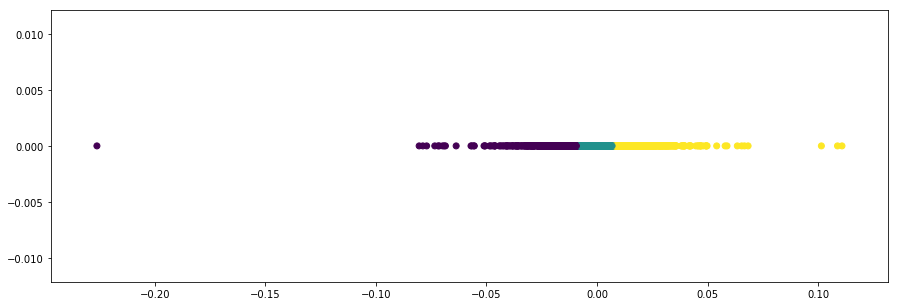

In [7]:
#lineoffsets1 = np.array([-15, -3, 1, 1.5, 6, 10])
plt.subplots(figsize=(15, 5))
plt.scatter(close1.Close,close1.zero,c=kmeans.labels_)

In [7]:
# 
odata = data.copy()
Close_Y = data.Close_Y
noNeed = data.pop('Close_Y')

In [8]:
Y = classes2(Close_Y)

In [9]:
index = data.index
columns = data.columns

In [10]:
from sklearn.preprocessing import StandardScaler
#fit_transform
scaler = StandardScaler()
scaler_data = scaler.fit_transform(data)

In [11]:
scalered_data = pd.DataFrame(scaler_data,columns =columns,index=index)

In [12]:
# 特征选择
#data = data.loc[:,selected_fea]

## 划分训练集

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scalered_data, Y, test_size=0.2, random_state=42)

## 训练

In [13]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
clf = RandomForestClassifier(oob_score=True,random_state=0,n_estimators =100)

In [15]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [16]:
result = clf.predict(X_test)

In [17]:
pd.Series(result).value_counts()

1    859
0    666
dtype: int64

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, result)

0.499672131147541

In [20]:
clf.oob_score_

0.5016393442622951

In [18]:
clf.feature_importances_

array([5.99267534e-02, 4.87770655e-02, 5.46076567e-02, 5.59145943e-02,
       5.17011278e-02, 1.21639623e-03, 5.95732873e-02, 6.03622939e-02,
       5.88163795e-02, 3.36501782e-02, 3.29313761e-02, 3.18836931e-02,
       4.07043037e-02, 3.43334080e-02, 3.22457404e-02, 3.34572441e-02,
       5.29378981e-03, 4.95675132e-03, 4.09436333e-03, 3.72299727e-03,
       4.70814298e-03, 4.75940529e-03, 4.80164600e-03, 5.19940650e-03,
       5.08059215e-03, 5.52785602e-03, 4.91424418e-03, 4.77815081e-03,
       5.13375749e-03, 5.21811144e-03, 5.40729317e-03, 4.20184696e-03,
       3.38226520e-03, 3.43744476e-03, 5.42804217e-03, 4.36739681e-03,
       4.39341592e-03, 4.37971463e-03, 4.72354398e-03, 4.63652514e-03,
       4.84728225e-03, 4.92435738e-03, 4.23371594e-03, 4.55545294e-03,
       5.03952228e-03, 5.21196373e-03, 4.40236123e-03, 4.94446541e-03,
       4.36401273e-03, 4.89127587e-03, 4.58278156e-03, 4.79215649e-03,
       4.78716550e-03, 4.38467041e-03, 5.03048481e-03, 4.39522674e-03,
      

In [21]:
from sklearn.feature_selection import f_classif

In [22]:
f_score = f_classif(X_train,y_train)
#pd.DataFrame(f_score)
col = X_train.columns

In [23]:
fea_f = pd.Series(f_score[0],index=col)

In [24]:
fea_f_sort = fea_f.sort_values(ascending = False)

In [26]:
fea_f_sort.GOLD_DAILYIND_USD#.index.values[:35]

0.8741425097187162

In [44]:
selected_fea = fea_f_sort.index.values[:35]

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [92]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

## n_estimators

In [93]:
n_estimators = np.arange(100,1000,100)
param_test1 = dict(n_estimators=n_estimators)
param_test1

{'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])}

In [94]:
clf = RandomForestClassifier(oob_score=True,
                             random_state=0)

gsearch2 = GridSearchCV(clf, param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=kfold)
gsearch2.fit(X_train , y_train)
gsearch2.grid_scores_, gsearch2.best_params_,     gsearch2.best_score_

/Users/xhxt2008/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.59180, std: 0.02012, params: {'n_estimators': 100},
  mean: 0.60295, std: 0.01921, params: {'n_estimators': 200},
  mean: 0.60066, std: 0.01667, params: {'n_estimators': 300},
  mean: 0.60492, std: 0.01542, params: {'n_estimators': 400},
  mean: 0.60262, std: 0.01577, params: {'n_estimators': 500},
  mean: 0.60410, std: 0.01641, params: {'n_estimators': 600},
  mean: 0.60180, std: 0.01455, params: {'n_estimators': 700},
  mean: 0.60098, std: 0.01302, params: {'n_estimators': 800},
  mean: 0.60082, std: 0.01582, params: {'n_estimators': 900}],
 {'n_estimators': 400},
 0.6049180327868853)

## max_depth min_samples_split

In [97]:
max_depth = np.arange(10,20,2)
min_samples_split = np.arange(150,301,20)

param_test2 = dict(max_depth=max_depth,min_samples_split=min_samples_split)
param_test2

{'max_depth': array([10, 12, 14, 16, 18]),
 'min_samples_split': array([150, 170, 190, 210, 230, 250, 270, 290])}

In [98]:
clf = RandomForestClassifier(oob_score=True,
                             random_state=0,
                             n_estimators=100
                             )

gsearch3 = GridSearchCV(clf, param_grid = param_test2, scoring='accuracy',n_jobs=-1, cv=kfold)
gsearch3.fit(X_train , y_train)
gsearch3.grid_scores_, gsearch3.best_params_,     gsearch3.best_score_

/Users/xhxt2008/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.58672, std: 0.01391, params: {'min_samples_split': 150, 'max_depth': 10},
  mean: 0.58508, std: 0.01203, params: {'min_samples_split': 170, 'max_depth': 10},
  mean: 0.57590, std: 0.01771, params: {'min_samples_split': 190, 'max_depth': 10},
  mean: 0.57492, std: 0.01732, params: {'min_samples_split': 210, 'max_depth': 10},
  mean: 0.57131, std: 0.01717, params: {'min_samples_split': 230, 'max_depth': 10},
  mean: 0.56934, std: 0.01709, params: {'min_samples_split': 250, 'max_depth': 10},
  mean: 0.57131, std: 0.01593, params: {'min_samples_split': 270, 'max_depth': 10},
  mean: 0.56918, std: 0.01305, params: {'min_samples_split': 290, 'max_depth': 10},
  mean: 0.59525, std: 0.01426, params: {'min_samples_split': 150, 'max_depth': 12},
  mean: 0.58902, std: 0.01262, params: {'min_samples_split': 170, 'max_depth': 12},
  mean: 0.58049, std: 0.01599, params: {'min_samples_split': 190, 'max_depth': 12},
  mean: 0.57820, std: 0.01583, params: {'min_samples_split': 210, 'max_depth

## min_samples_split min_samples_leaf

In [103]:
min_samples_leaf = np.arange(5,30,5)
min_samples_split = np.arange(50,191,20)

param_test3 = dict(min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
param_test3

{'min_samples_leaf': array([ 5, 10, 15, 20, 25]),
 'min_samples_split': array([ 50,  70,  90, 110, 130, 150, 170, 190])}

In [104]:
clf = RandomForestClassifier(oob_score=True,
                             random_state=0,
                             n_estimators=100,
                             max_depth=12,
                             
                             )

gsearch4 = GridSearchCV(clf, param_grid = param_test3, scoring='accuracy',n_jobs=-1, cv=kfold)
gsearch4.fit(X_train , y_train)
gsearch4.grid_scores_, gsearch4.best_params_,     gsearch4.best_score_

/Users/xhxt2008/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.60148, std: 0.01480, params: {'min_samples_split': 50, 'min_samples_leaf': 5},
  mean: 0.60459, std: 0.01036, params: {'min_samples_split': 70, 'min_samples_leaf': 5},
  mean: 0.60066, std: 0.01616, params: {'min_samples_split': 90, 'min_samples_leaf': 5},
  mean: 0.59672, std: 0.01589, params: {'min_samples_split': 110, 'min_samples_leaf': 5},
  mean: 0.59328, std: 0.01102, params: {'min_samples_split': 130, 'min_samples_leaf': 5},
  mean: 0.59016, std: 0.01357, params: {'min_samples_split': 150, 'min_samples_leaf': 5},
  mean: 0.58721, std: 0.01285, params: {'min_samples_split': 170, 'min_samples_leaf': 5},
  mean: 0.58115, std: 0.01412, params: {'min_samples_split': 190, 'min_samples_leaf': 5},
  mean: 0.60492, std: 0.01437, params: {'min_samples_split': 50, 'min_samples_leaf': 10},
  mean: 0.60590, std: 0.01034, params: {'min_samples_split': 70, 'min_samples_leaf': 10},
  mean: 0.59967, std: 0.01475, params: {'min_samples_split': 90, 'min_samples_leaf': 10},
  mean: 0.594

## min_samples_split min_samples_leaf

In [112]:
#max_features = ['sqrt','log2','auto']
max_features = np.arange(0.8,1.01,0.1)
param_test4 = dict(max_features=max_features)
param_test4

{'max_features': array([0.8, 0.9, 1. ])}

In [113]:
clf = RandomForestClassifier(oob_score=True,
                             random_state=0,
                             n_estimators=100,
                             max_depth=12,
                             min_samples_split=70,
                             min_samples_leaf=15
                             )

gsearch5 = GridSearchCV(clf, param_grid = param_test4, scoring='accuracy',n_jobs=-1, cv=kfold)
gsearch5.fit(X_train , y_train)
gsearch5.grid_scores_, gsearch5.best_params_,     gsearch5.best_score_

/Users/xhxt2008/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.70180, std: 0.01462, params: {'max_features': 0.8},
  mean: 0.69984, std: 0.01506, params: {'max_features': 0.9},
  mean: 0.70098, std: 0.01572, params: {'max_features': 1.0}],
 {'max_features': 0.8},
 0.7018032786885245)

In [23]:
X_train.zero.value_counts()

-0.053974    4017
 1.667997    1130
-1.775945     953
Name: zero, dtype: int64

In [115]:
clf.fit(X_test,y_test)
clf.oob_score_

0.33704918032786885

In [99]:
X_train.columns.values

array(['Close', 'DFF', 'DGS5', 'DGS10', 'TEDRATE', 'DPRIME', 'DCOILWTICO',
       'DTWEXM', 'USEPUINDXD', 'M1', 'M2', 'EXCSRESNW', 'TOTCI', 'GDTCBW',
       'GDDDCBW', 'GDBFRW', 'CPIAUCSL', 'CPILFESL', 'UNRATE', 'CIVPART',
       'UNEMPLOY', 'PAYEMS', 'MANEMP', 'DSPIC96', 'PCE', 'PCEDG',
       'PSAVERT', 'DSPI', 'INDPRO', 'TCU', 'HOUST', 'USSLIND', 'IQ300',
       'IR300', 'IR120', 'USSLIND.1', 'IR213COM', 'IQ213COM', 'IR21320',
       'IR10000', 'IQ00200', 'IQ21320', 'IQ002', 'IQ00000', 'IQ21300',
       'IR', 'IQ', 'MSACSRNSA', 'LNS14000006', 'LNU05000006',
       'LNS12000006', 'LNS13000006', 'IQ10', 'HSN1FNSA', 'HSN1F',
       'HNFSEPUSSA', 'HNFSUSNSA', 'LNU00000006', 'LNU02300006',
       'LNS12300006', 'ASPNHSUS', 'FEDMINFRMWG', 'FEDMINNFRWG',
       'LNU01300006', 'USGVDDNS', 'USGDCB', 'USGSEC', 'GDP', 'GDPC1',
       'GDPPOT', 'GDPDEF', 'M1V', 'M2V', 'NROU', 'NROUST', 'GPDI', 'CP',
       'GFDEBTN', 'GFDEGDQ188S', 'W240RG3Q086SBEA', 'W242RG3Q086SBEA',
       'W243RL1Q225SBEA',